IMPORT LIBRARY

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

IMPORT DATA

In [20]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


LOAD DATASET

In [21]:
#Baca datanya
df = pd.read_csv('train.csv')

#cek 5 baris pertama
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


MEMAHAMI STRUKTUR DATA

In [22]:
#cek struktur kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
#Statistik deskriptif awal
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


CEK DAN TANGANI MISSING VALUE
& DATA CLEANING

In [24]:
#Cek jumlah missing value per kolom
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
#Inputasi missing value kolom 'Age' dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

#ini Inputasi missing value 'Embarked' sama modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Drop 'Cabin' karena terlalu banyak missing value
df = df.drop('Cabin', axis=1)

In [27]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
#Cek apakah ada baris duplikat
df.duplicated().sum()

np.int64(0)

In [40]:
#Menghapus baris duplikat jika ada
df = df.drop_duplicates()

DETEKSI DAN ANALISIS OUTLIER

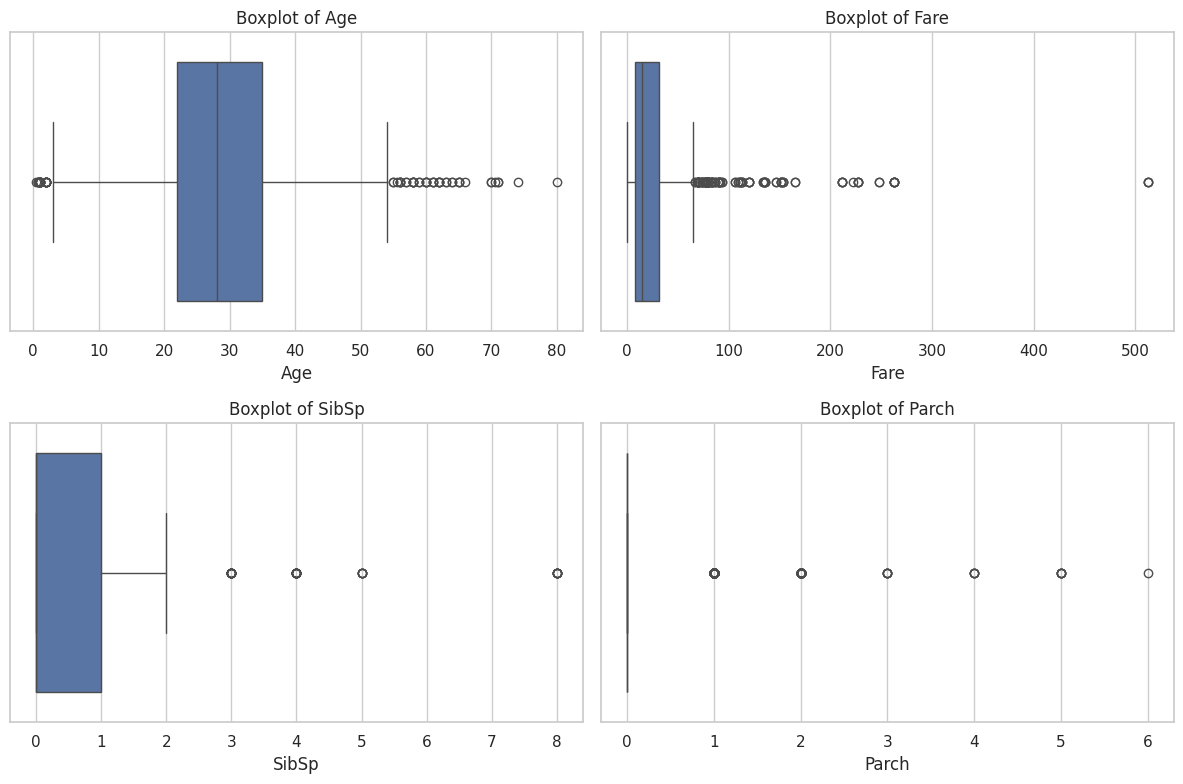

In [28]:
#ini plot boxplot buat kolom numerik
numerik = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))
for i, kolom in enumerate(numerik):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[kolom])
    plt.title(f'Boxplot of {kolom}')
plt.tight_layout()
plt.show()

In [41]:
#Hitung IQR buat kolom Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

#menentukan batas bawah dan juga atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

#Filter baris yang outlier
outlier_fare = df[(df['Fare'] < batas_bawah) | (df['Fare'] > batas_atas)]
print(f"Jumlah outlier pada kolom Fare:{outlier_fare.shape[0]}")

Jumlah outlier pada kolom Fare:116


TRANSFORMASI LOG UNTUK KOLOM 'FARE'

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


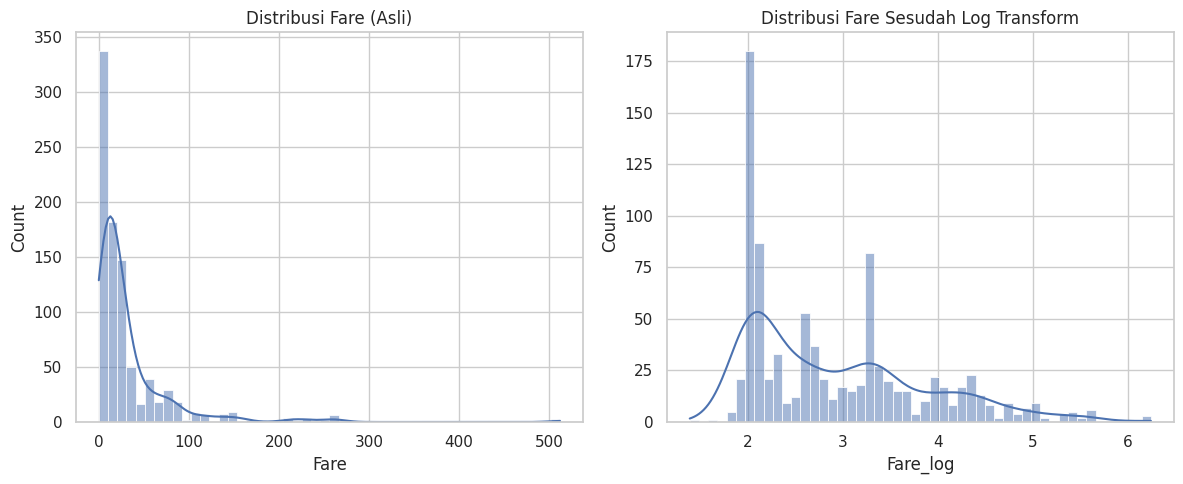

In [31]:
import numpy as np

#tambah kolom baru yang udah ditransformasi log
df['Fare_log'] = np.log(df['Fare'])

#visualisasi perbandingan distribusi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Distribusi Fare (Asli)')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare_log'], bins=50, kde=True)
plt.title('Distribusi Fare Sesudah Log Transform')

plt.tight_layout()
plt.show()

ENCODING KOLOM KATEGORIKAL

In [33]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [35]:
#ubah 'Sex' dari teks ke angka
df['Sex'] = df['Sex'].map({'male':0, 'female': 1})

In [36]:
#One-hot encoding kolom'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [37]:
#drop 'Name' dan 'Ticket' tidak digunakan dalam modeling
df =df.drop(['Name', 'Ticket'], axis=1)

CEK DATA AKHIR

In [38]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Fare_log,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,NaN,1.981001,False,True
1,2,1,1,1,38.0,1,0,71.2833,C85,4.266662,False,False
2,3,1,3,1,26.0,0,0,7.9250,NaN,2.070022,False,True
3,4,1,1,1,35.0,1,0,53.1000,C123,3.972177,False,True
4,5,0,3,0,35.0,0,0,8.0500,NaN,2.085672,False,True
